# Hyeongsan

In [120]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from swatmf_pkgs import swatmf_viz


# Set Path

In [93]:
wd = "D:/Projects/Watersheds/Hyeongsan"
inf = "flow and sediment analysis.xlsx"


In [94]:
os.chdir(wd)

In [95]:
df = pd.read_excel(inf, skiprows=1, usecols=[0, 1, 4, 6], names=['mon', 'prep', 'str_yld', 'sed_yld'])
df = df.loc[:11, :]
df['str_yld'] = df.loc[:, 'str_yld']*1108190000*0.001
df

,mon,prep,str_yld,sed_yld
0,1,22.75,9.15365e+06,0.01
1,2,39.62,1.67558e+07,0.06
2,3,63.92,3.55286e+07,0.21
3,4,91.98,4.8173e+07,0.56
4,5,66.39,3.59275e+07,0.25
5,6,88.31,3.88088e+07,0.19
6,7,177.04,1.14476e+08,0.37
7,8,187.31,1.03062e+08,0.1
8,9,169.29,1.08137e+08,0.08
9,10,113.04,8.16293e+07,0.07


In [96]:
from matplotlib.ticker import FuncFormatter
from swatmf_pkgs.swatmf_viz import y_fmt

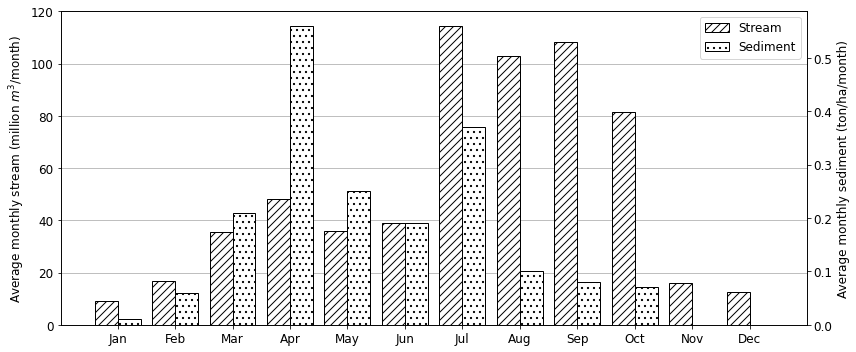

In [97]:
f, ax = plt.subplots(figsize=(12,5))
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec']

w = 0.4
ax.bar(
    df.index-0.2, df.str_yld, width=w, hatch='///', color='white',
    edgecolor='black', zorder=5,
    label='Stream',)

ax2=ax.twinx()
ax2.bar(
    df.index+0.2, df.sed_yld, width=w, label='Sediment',
    color="white",
    hatch='..',
    align='center',
    edgecolor='black',
    zorder=5)

ax.tick_params(axis='both', labelsize=12)
ax.yaxis.set_major_formatter(FuncFormatter(y_fmt))
ax.set_ylabel(r'Average monthly stream (million $m^3$/month)', fontsize = 12)
ax2.set_ylabel(r'Average monthly sediment (ton/ha/month)', fontsize = 12)
ax.set_xticks(df.index[::1])
ax.set_xticklabels(month_names)
ax.grid(axis='y', zorder=0)
ax2.tick_params(axis='both', labelsize=12)
l1, lb1 = ax.get_legend_handles_labels()
l2, lb2 = ax2.get_legend_handles_labels()

plt.legend(
    l1+l2, lb1+lb2,
    loc = 'upper right',
    # ncol=2,
    # bbox_to_anchor=(0.95, 1.1),
    fontsize=12,
    # ha='left'
    )

# plt.legend()
plt.tight_layout()
plt.savefig('mon_str_sed_f.png', dpi=300, bbox_inches="tight")
plt.show()

In [18]:
df = pd.read_csv(
            os.path.join("output.rch"),
            delim_whitespace=True,
            skiprows=9,
            usecols=[1, 3, 6, 10],
            names=["date", "filter", "str_sim", 'sed_sim'],
            index_col=0)
df = df.loc[20]
# if time_step == 'M':
# df = df[df["filter"] < 13]
df.index = pd.date_range('1/1/2009', periods=len(df.str_sim), freq='D')
df = df.drop('filter', axis=1)


In [21]:
df.dtypes

str_sim    float64
sed_sim    float64
dtype: object

In [23]:
df['str_sim'] = df.loc[:, 'str_sim'] * 86400


In [24]:
df

,str_sim,sed_sim
2009-01-01,110073.6,0.3938
2009-01-02,111024.0,0.3965
2009-01-03,111628.8,0.3969
2009-01-04,111888.0,0.3953
2009-01-05,111888.0,0.3919
...,...,...
2019-12-27,484185.6,3.3340
2019-12-28,476064.0,3.5450
2019-12-29,470275.2,3.4580
2019-12-30,464313.6,3.3720


In [28]:
mdf = df.resample('M').sum()
mdf =  mdf.groupby(mdf.index.month).mean()
mdf['sed_sim'] = mdf.loc[:, 'sed_sim']/10000


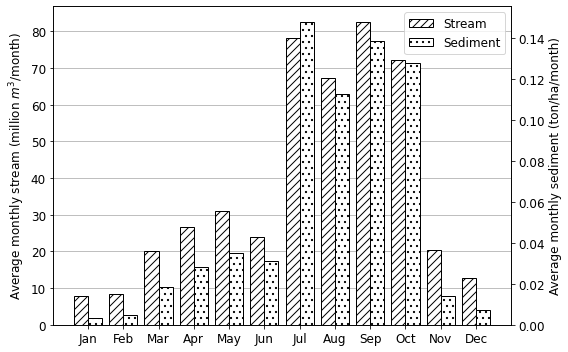

In [30]:
f, ax = plt.subplots(figsize=(8,5))
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec']

w = 0.4
ax.bar(
    mdf.index-0.2, mdf.str_sim, width=w, hatch='///', color='white',
    edgecolor='black', zorder=5,
    label='Stream',)

ax2=ax.twinx()
ax2.bar(
    mdf.index+0.2, mdf.sed_sim, width=w, label='Sediment',
    color="white",
    hatch='..',
    align='center',
    edgecolor='black',
    zorder=5)

ax.tick_params(axis='both', labelsize=12)
ax.yaxis.set_major_formatter(FuncFormatter(y_fmt))
# ax2.yaxis.set_major_formatter(FuncFormatter(y_fmt))
ax.set_ylabel(r'Average monthly stream (million $m^3$/month)', fontsize = 12)
ax2.set_ylabel(r'Average monthly sediment (ton/ha/month)', fontsize = 12)
ax.set_xticks(mdf.index[::1])
ax.set_xticklabels(month_names)
ax.grid(axis='y', zorder=0)
ax2.tick_params(axis='both', labelsize=12)
l1, lb1 = ax.get_legend_handles_labels()
l2, lb2 = ax2.get_legend_handles_labels()

plt.legend(
    l1+l2, lb1+lb2,
    loc = 'upper right',
    # ncol=2,
    # bbox_to_anchor=(0.95, 1.1),
    fontsize=12,
    # ha='left'
    )

# plt.legend()
plt.tight_layout()
plt.savefig('mon_str_sed_sub20.png', dpi=300, bbox_inches="tight")
plt.show()

In [97]:
mdf

,str_sim,sed_sim
1,7.849101e+06,2.771199e+06
2,8.271059e+06,4.163063e+06
3,2.022187e+07,1.594994e+07
4,2.670913e+07,2.443478e+07
5,3.102644e+07,3.040308e+07
6,2.389365e+07,2.668449e+07
7,7.821094e+07,1.277646e+08
8,6.736640e+07,9.725747e+07
9,8.268277e+07,1.195818e+08
10,7.210649e+07,1.101854e+08


In [20]:
df = pd.read_csv(
            os.path.join("output.rch"),
            delim_whitespace=True,
            skiprows=9,
            # usecols=[1, 3, 6, 10],
            # names=["date", "filter", "str_sim", 'sed_sim'],
            usecols=[1, 10],
            names=['date','sed_sim'],
            index_col=0)

In [21]:
df

,sed_sim
date,
1,5.300000e-08
2,4.300000e-08
3,8.482000e-02
4,3.500000e-08
5,1.351000e-01
...,...
71,1.578000e-01
72,6.931000e-02
73,2.998000e-08


In [25]:
tot_sed = pd.DataFrame()
for i in range(1, 76):
    sdf = df.loc[i, :]
    # if time_step == 'M':
    # df = df[df["filter"] < 13]
    sdf.index = pd.date_range('1/1/2009', periods=len(sdf.sed_sim), freq='D')
    sdf.rename(columns = {'sed_sim':'sub_{}'.format(i)}, inplace = True)
    tot_sed = pd.concat(
        [tot_sed, sdf['sub_{}'.format(i)]], axis=1,
        sort=False
        )


xing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\seonggyu.park\Miniconda3\envs\spark\lib\site-packages\pandas\core\frame.py:4301: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\seonggyu.park\Miniconda3\envs\spark\lib\site-packages\pandas\core\frame.py:4301: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\seonggyu.park\Miniconda3\envs\spark\lib\site-packages\pandas\core\frame.py:4301: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

In [56]:
tot_sed.index = pd.to_datetime(tot_sed.index)

In [59]:
mtot_sed = tot_sed.resample('M').sum()

In [89]:
len(mtot_sed.columns)

75

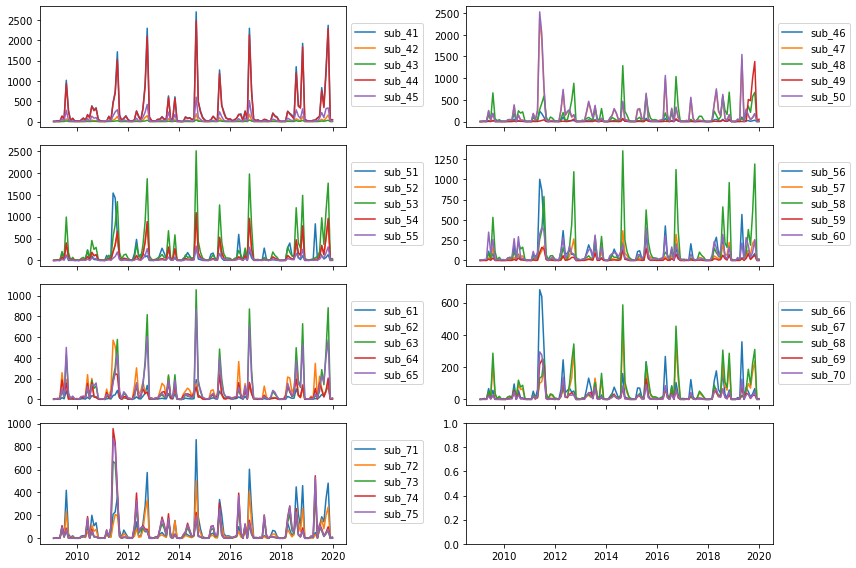

In [91]:
f, axes = plt.subplots(4, 2, figsize=(12, 8), sharex=True)
for i, ax in zip(range(8, 15), axes.flat):
    st_col = i*5
    end_col = st_col + 5
    ax.plot(
        mtot_sed.index, mtot_sed.iloc[:, st_col:end_col],
        # label=tot_sed.columns.tolist()[i:i+7]
        )
    ax.legend(
        mtot_sed.columns.tolist()[st_col:end_col], 
        bbox_to_anchor=(1., 0.9),
        # loc='upper right'
        )
plt.tight_layout()
plt.savefig('sed_analysis40-75.png', dpi=300, bbox_inches="tight")
plt.show()
    # print(st_col, end_col)
# plt.legend()
    # ax.legend()

In [45]:
i = 0

In [46]:
tot_sed.columns.tolist()[i:i+7]

['sub_1', 'sub_2', 'sub_3', 'sub_4', 'sub_5', 'sub_6', 'sub_7']

In [100]:
import numpy as np

In [114]:
startDate = '1/1/2009'

In [169]:
with open(os.path.join("output.std"), "r") as infile:
    lines = []
    y = ("TIME", "UNIT", "SWAT", "(mm)")
    for line in infile:
        data = line.strip()
        if len(data) > 100 and not data.startswith(y):  # 1st filter
            lines.append(line)
eYear = '2019'
dates = []
for line in lines:  # 2nd filter
    try:
        date = line.split()[0]
        if (date == eYear):  # Stop looping
            break
        elif(len(str(date)) == 4):  # filter years
            continue
        else:
            dates.append(line)
    except:
        pass
date_f, prec, surq, latq, gwq, swgw, perco, et, sw, gw = [], [], [], [], [], [], [], [], [], []
for i in range(len(dates)): # 3rd filter and obtain necessary data
    if (int(dates[i].split()[0]) == 1) and (int(dates[i].split()[0]) - int(dates[i - 1].split()[0]) == -30):
        continue
    elif (int(dates[i].split()[0]) < int(dates[i-1].split()[0])) and (int(dates[i].split()[0]) != 1):
        continue
    else:
        date_f.append(int(dates[i].split()[0]))
        prec.append(float(dates[i].split()[1]))
        surq.append(float(dates[i].split()[2]))
        latq.append(float(dates[i].split()[3]))
        gwq.append(float(dates[i].split()[4]))
        # swgw.append(float(dates[i].split()[5]))
        perco.append(float(dates[i].split()[5]))
        sw.append(float(dates[i].split()[7]))  
        et.append(float(dates[i].split()[8]))  # not use it for now
        # sw.append(float(dates[i].split()[10]))
        # gw.append(float(dates[i].split()[11]))
names = ["prec", "surq", "latq", "gwq", "perco", "sw","et"]
data = pd.DataFrame(
    np.column_stack([prec, surq, latq, gwq, perco, sw, et]),
    columns=names)
data.index = pd.date_range(startDate, periods=len(data), freq='M')

In [170]:
data

,prec,surq,latq,gwq,perco,sw,et
2009-01-31,16.07,0.50,1.68,0.00,0.07,74.46,5.11
2009-02-28,27.03,1.03,6.26,0.00,1.02,81.43,12.08
2009-03-31,33.09,1.38,8.55,0.00,2.71,81.91,20.71
2009-04-30,25.58,0.87,3.46,0.00,0.15,78.11,24.88
2009-05-31,104.90,27.20,24.99,0.00,11.67,85.91,32.11
...,...,...,...,...,...,...,...
2019-08-31,198.49,45.21,46.72,3.49,28.44,93.47,63.37
2019-09-30,250.31,108.55,56.82,5.39,39.56,95.00,43.16
2019-10-31,275.87,158.09,48.56,7.75,28.72,93.90,42.57
2019-11-30,28.75,1.37,4.67,6.14,1.17,91.40,24.03


C:\Users\seonggyu.park\Miniconda3\envs\spark\lib\site-packages\ipykernel_launcher.py:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


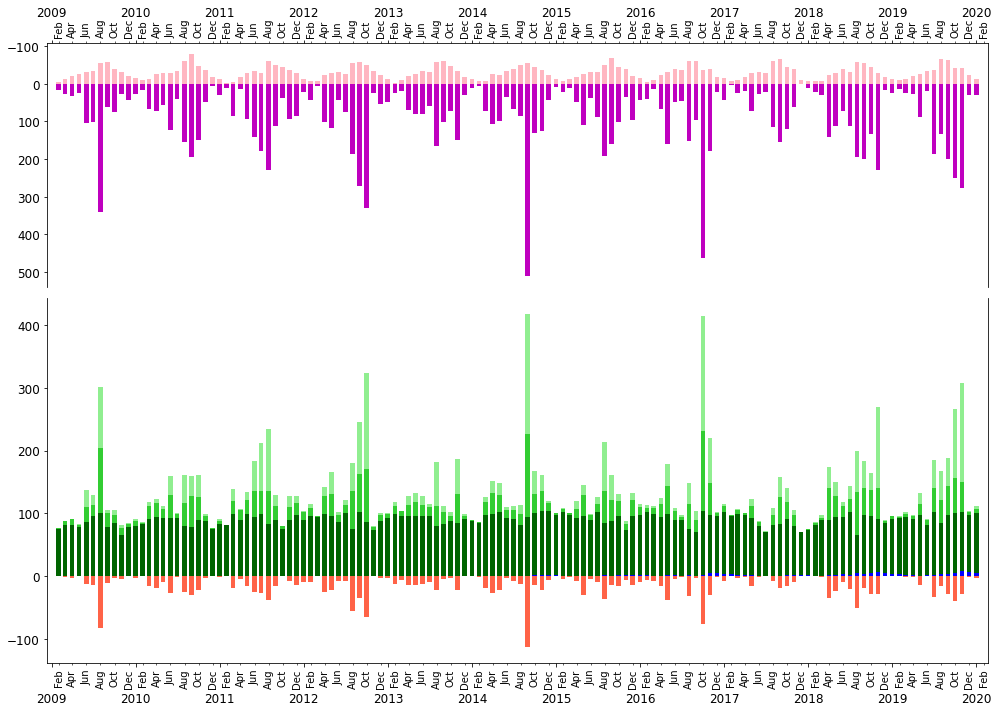

In [215]:
fig, axes = plt.subplots(
    2, 1, figsize=(14,10),
    gridspec_kw={
            'height_ratios': [0.4, 0.6],
            # 'wspace': 0.01,
            # 'hspace': 0.3,

                    })

ax1 = fig.add_axes([0.65, 0.4, 0.3, 0.53], frameon=False)
ax1.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)

axes[0].bar(data.index, data.prec, width=20, label='Precipitation',align='center', color='m')
axes[0].bar(data.index, data.et*-1, width=20, label='ET',align='center',  color='lightpink')
axes[0].invert_yaxis()
axes[0].tick_params(axis='both', labelsize=12)
axes[0].xaxis.tick_top()
axes[0].spines['bottom'].set_visible(False)

axes[1].bar(data.index, data.gwq, width=20, label='Baseflow',align='center', color='b')
axes[1].bar(data.index, data.sw, width=20, bottom=data.gwq, label='Soil Moisture',align='center', color='darkgreen')
axes[1].bar(data.index, data.latq, bottom=data.gwq+data.sw, width=20, label='Lateral Flow', align='center', color='limegreen')
axes[1].bar(data.index, data.surq, bottom=data.gwq + data.latq+data.sw,  width=20, label='Runoff', align='center',color='lightgreen')
axes[1].bar(data.index, data.perco*-1, width=20, label='Groundwater Recharge', align='center', color='tomato')
axes[1].tick_params(axis='both', labelsize=12)
axes[1].margins(x=0.01)
axes[0].margins(x=0.01)
# axes[1].legend(loc='upper left', fontsize=12)

# explode = (0, 0, 0, 0.5)
# ax1.pie(
#     amgwdf, explode=explode,
#     # labels=amgwdf.index,
#     # autopct='%1.2f%%',
#     shadow=False, startangle=0, textprops={'fontsize': 14, 'color': 'k'}, )
# ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

years = mdates.YearLocator()
months = mdates.MonthLocator(interval=2)
monthsFmt = mdates.DateFormatter('%b') 
yearsFmt = mdates.DateFormatter('%Y')
# ax.xaxis.set_ticks_position('top')
axes[1].xaxis.set_minor_locator(months)
axes[1].xaxis.set_minor_formatter(monthsFmt)
plt.setp(axes[1].xaxis.get_minorticklabels(), fontsize=10, rotation=90)
axes[1].xaxis.set_major_locator(years)
axes[1].xaxis.set_major_formatter(yearsFmt)
axes[1].tick_params(axis='x', pad=25) # add some space for the year label
axes[1].spines['top'].set_visible(False)

axes[0].xaxis.set_minor_locator(months)
axes[0].xaxis.set_minor_formatter(monthsFmt)
plt.setp(axes[0].xaxis.get_minorticklabels(), fontsize=10, rotation=90)
axes[0].xaxis.set_major_locator(years)
axes[0].xaxis.set_major_formatter(yearsFmt)
axes[0].tick_params(axis='x', pad=20) # add some space for the year label

# axes[0].set_xticks(data.index[::1])


# axes[0].set_ylabel(r'Monthly Water Volume $(mm/month)$', fontsize=12)

fig.tight_layout()
plt.savefig(os.path.join('fig11_wb.png'), dpi=300, bbox_inches="tight")
plt.show()


In [104]:
os.getcwd()

'D:\\Projects\\Watersheds\\Hyeongsan'

In [171]:
adata = data.resample('A').sum().mean()

In [172]:
adata

prec     1077.808182
surq      269.336364
latq      267.919091
gwq        14.250000
perco     171.092727
sw       1068.740909
et        364.472727
dtype: float64

In [193]:
adata = adata.reindex(index=['surq', 'latq','gwq', 'perco', 'et'])
adata = adata.drop('sw')

In [211]:
adata

surq     269.336364
latq     267.919091
gwq       14.250000
perco    171.092727
et       364.472727
dtype: float64

In [202]:
explode = (0, 0,0.1,0.2,0.2)

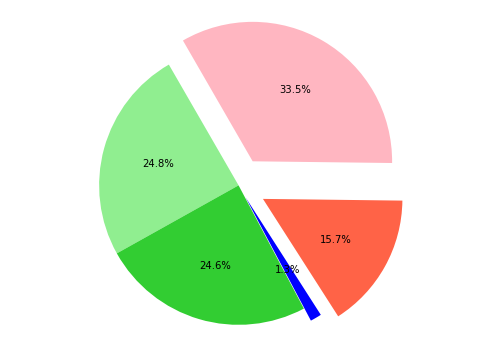

In [208]:
fig, ax = plt.subplots(figsize=(7,5))
ax.pie(
    adata, startangle=120,
    colors=['lightgreen', 'limegreen', 'b', 'tomato', 'lightpink'], explode=explode,
     autopct='%1.1f%%'
     )
ax.axis('equal')
fig.tight_layout()
plt.savefig(os.path.join('pie_chart.png'), dpi=300, bbox_inches="tight")
plt.show()

In [209]:
15.2+24.7+24.6+33.5+2.1

100.1

In [210]:
24.8+24.6+33.5+15.7+1.7

100.30000000000001